## Table of Contents

1. [The SQL Tutorial for Data Analysis](#introduction)  
    1.1 [Dataset Used](#data)
2. [SELECT and FROM](#select)  
   2.1 [Select all the columns from the dataset](#all)  
   2.2 [Select specific columns from the dataset](#specific)  
3. [LIMIT](#limiting)
4. [WHERE](#where)
5. [Comparison Operators](#comparison)  
    5.1 [Comparison operators on numerical data](#numerical)  
    5.2 [Comparison operators on non numerical data](#nonnumerical)  
    5.3 [Arithmetic in SQL](#arithmetic)
6. [Logical Operators](#logical)  
    6.1 [LIKE](#like)  
    6.2 [IN](#in)  
    6.3 [BETWEEN](#between)  
    6.4 [IS NULL](#isnull)  
    6.5 [AND](#and)  
    6.6 [OR](#or)  
    6.7 [NOT](#not)  
    6.8 [ORDER BY](#orderby)

### 1. Introduction <a id = "introduction"></a>
> **What is SQL?**  
SQL (Structured Query Language) is a programming language designed for managing data in a relational database.

> * It's easy to understand and learn.
> * Because it can be used to access large amounts of data directly where it's stored, analysts don't have to copy data into other applications. 
> * SQL is great for performing the types of aggregations that you might normally do in an Excel pivot table—sums, counts, minimums and maximums, etc.—but over much larger datasets and on multiple tables at the same time.

> **What is a database?**  
A database is an organized collection of data.

> **What is a schema?**  
A schema is a collection of database objects like tables.

### 1.1 Dataset used <a id = "data"></a>
The dataset contains information about different products sold on Flipkart. Each row denotes a product and various columns give information about the specific product

In [1]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

In [2]:
import pandas as pd
df1 = pd.read_csv(r"D:\Documents\Internships\GymCounselor\SQL RKT\flipkartdata.csv")

In [3]:
# Dataframe size
df1.shape

(20000, 15)

In [4]:
df1.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [5]:
df1.dtypes

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object

In [6]:
df1.to_sql('sales', con=engine)

### 2. SELECT and FROM <a id = "select"></a>
SELECT indicates which columns you would like to view, and FROM identifies the table that they live in.

### 2.1 Select all the columns from the dataset <a id = "all"></a>

In [7]:
pd.read_sql("""SELECT * 
            FROM sales """, engine)

,index,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",0,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",0,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",0,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",0,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",0,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
5,5,c2a17313954882c1dba461863e98adf2,2016-03-25 22:59:23 +0000,http://www.flipkart.com/eternal-gandhi-super-s...,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",PWTEB7H2E4KCYUE3,430.0,430.0,"[""http://img5a.flixcart.com/image/paper-weight...",0,Key Features of Eternal Gandhi Super Series Cr...,No rating available,No rating available,Eternal Gandhi,"{""product_specification""=>[{""key""=>""Model Name..."
6,6,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",0,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
7,7,8542703ca9e6ebdf6d742638dfb1f2ca,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGYGHFUEXN,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/e/x...",0,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
8,8,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals","[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH3DZBFR88SCK,699.0,349.0,"[

### 2.2 Select specific columns from the dataset <a id = "specific"></a>

In [8]:
pd.read_sql("""SELECT uniq_id, 
            product_name
            FROM sales """, engine)

,uniq_id,product_name
0,c2d766ca982eca8304150849735ffef9,Alisha Solid Women's Cycling Shorts
1,7f7036a6d550aaa89d34c77bd39a5e48,FabHomeDecor Fabric Double Sofa Bed
2,f449ec65dcbc041b6ae5e6a32717d01b,AW Bellies
3,0973b37acd0c664e3de26e97e5571454,Alisha Solid Women's Cycling Shorts
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,Sicons All Purpose Arnica Dog Shampoo
5,c2a17313954882c1dba461863e98adf2,Eternal Gandhi Super Series Crystal Paper Weig...
6,ce5a6818f7707e2cb61fdcdbba61f5ad,Alisha Solid Women's Cycling Shorts
7,8542703ca9e6ebdf6d742638dfb1f2ca,FabHomeDecor Fabric Double Sofa Bed
8,29c8d290caa451f97b1c32df64477a2c,"dilli bazaaar Bellies, Corporate Casuals, Casuals"
9,4044c0ac52c1ee4b28777417651faf42,Alisha Solid Women's Cycling Shorts


#### Selecting specific columns from the dataset while specifying the column names

In [9]:
pd.read_sql("""SELECT uniq_id AS "id", 
            product_name AS "Product Name"
            FROM sales """, engine)

,id,Product Name
0,c2d766ca982eca8304150849735ffef9,Alisha Solid Women's Cycling Shorts
1,7f7036a6d550aaa89d34c77bd39a5e48,FabHomeDecor Fabric Double Sofa Bed
2,f449ec65dcbc041b6ae5e6a32717d01b,AW Bellies
3,0973b37acd0c664e3de26e97e5571454,Alisha Solid Women's Cycling Shorts
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,Sicons All Purpose Arnica Dog Shampoo
5,c2a17313954882c1dba461863e98adf2,Eternal Gandhi Super Series Crystal Paper Weig...
6,ce5a6818f7707e2cb61fdcdbba61f5ad,Alisha Solid Women's Cycling Shorts
7,8542703ca9e6ebdf6d742638dfb1f2ca,FabHomeDecor Fabric Double Sofa Bed
8,29c8d290caa451f97b1c32df64477a2c,"dilli bazaaar Bellies, Corporate Casuals, Casuals"
9,4044c0ac52c1ee4b28777417651faf42,Alisha Solid Women's Cycling Shorts


### 3. LIMIT <a id = "limiting"></a>
The limit command restricts how many rows the SQL query returns. This is particularly used to reduce the time taken to run a query because generally the main aim is to understand the table which can be done by viewing few rows of the data.

In [10]:
pd.read_sql("""SELECT uniq_id AS "id", 
            product_name AS "Product Name"
            FROM sales 
            LIMIT 5""", engine)

,id,Product Name
0,c2d766ca982eca8304150849735ffef9,Alisha Solid Women's Cycling Shorts
1,7f7036a6d550aaa89d34c77bd39a5e48,FabHomeDecor Fabric Double Sofa Bed
2,f449ec65dcbc041b6ae5e6a32717d01b,AW Bellies
3,0973b37acd0c664e3de26e97e5571454,Alisha Solid Women's Cycling Shorts
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,Sicons All Purpose Arnica Dog Shampoo


### 4. WHERE <a id = "where"></a>
Where clause is used to filter the data on the basis of a given condition.

In [11]:
pd.read_sql("""SELECT uniq_id AS "id",
            product_name AS "Product Name"
            FROM sales
            WHERE brand = "Alisha" """, engine)

,id,Product Name
0,c2d766ca982eca8304150849735ffef9,Alisha Solid Women's Cycling Shorts
1,0973b37acd0c664e3de26e97e5571454,Alisha Solid Women's Cycling Shorts
2,ce5a6818f7707e2cb61fdcdbba61f5ad,Alisha Solid Women's Cycling Shorts
3,4044c0ac52c1ee4b28777417651faf42,Alisha Solid Women's Cycling Shorts
4,9aacdecceb404c74abddc513fd2756a8,Alisha Solid Women's Cycling Shorts
5,d95b0456a0350bc42f2393c6e84b0f09,Alisha Solid Women's Cycling Shorts
6,ea98a65ad1e1b8688eddf89fbc7b3e27,Alisha Solid Women's Cycling Shorts


The above code displays only those products whose brand name is **Alisha**.

### 5. Comparison Operators <a id = "comparison"></a>

### 5.1 Comparison operators on numerical data <a id = "numerical"></a>

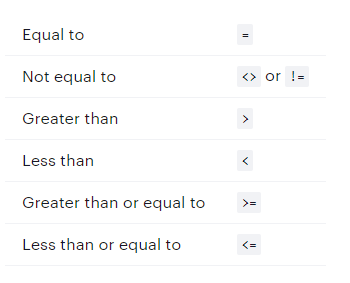

#### Products having retail price equal to Rs 1000

In [12]:
pd.read_sql("""SELECT pid AS "id",
            product_name AS "Product Name",
            retail_price AS "Retail Price"
            FROM sales
            WHERE retail_price = 1000 
            LIMIT 5""", engine)

,id,Product Name,Retail Price
0,DIAEJ8FGHZ3K86JU,"Tiara Diaries 2016-2017 Designer LA Kaarta ""TA...",1000.0
1,SHOE3TZMQHKWG7TT,Selfie Black Denim Boots,1000.0
2,CAYECGPSFMSBYTCF,Kings Multicolor Tassels,1000.0
3,TCVEHSMFAGATW2FZ,Prime Printed 4 Seater Table Cover,1000.0
4,TCVEHSMFEGNCAGYN,Prime Printed 4 Seater Table Cover,1000.0


#### Products having retail price greater than Rs 2000

In [13]:
pd.read_sql("""SELECT pid AS "id",
            product_name AS "Product Name",
            retail_price AS "Retail Price"
            FROM sales
            WHERE retail_price > 2000 
            LIMIT 5""", engine)

,id,Product Name,Retail Price
0,SBEEH3QGU7MFYJFY,FabHomeDecor Fabric Double Sofa Bed,32157.0
1,SBEEH3QGYGHFUEXN,FabHomeDecor Fabric Double Sofa Bed,32157.0
2,SWIEHF3EF5PZAZUY,Carrel Printed Women's,2299.0
3,SBEEH3QGAYAEPRCG,FabHomeDecor Fabric Double Sofa Bed,32157.0
4,SWIEHF3H7WG6VGMR,Carrel Printed Women's,2499.0


#### Products having retail price less than or equal to Rs 200

In [14]:
pd.read_sql("""SELECT pid AS "id",
            product_name AS "Product Name",
            retail_price AS "Retail Price"
            FROM sales
            WHERE retail_price <= 200 
            LIMIT 5""", engine)

,id,Product Name,Retail Price
0,PSOEH3ZXRTZJUVXM,Sicons Conditioning Conditoner Dog Shampoo,110.0
1,PTYEA6SFGD4X8NAR,Kennel Rubber Dumbell With Bell - Small Rubber...,190.0
2,MTYEJKESAJVRTGSS,Bento Musical Teddy Bear,199.0
3,SOPEJXBBKEAHD3NK,Medimix Transparent with Glycerine And Lakshadi,129.0
4,SOCEJPT5AHPUGYX4,Mode Men's Floral Print Crew Length Socks,199.0


### 5.2 Comparison operators on non numerical data <a id = "nonnumerical"></a>

All of the above operators work on non-numerical data as well. = and != make perfect sense—they allow you to select rows that match or don't match any value, respectively. 

#### Products which are rated by customers

In [15]:
pd.read_sql("""SELECT pid AS "id",
            product_name AS "Product Name",
            product_rating AS "Product Rating"
            FROM sales
            WHERE product_rating != "No rating available"
            LIMIT 5""", engine)

,id,Product Name,Product Rating
0,SHOEH4KM2W3Z6EH5,Ladela Bellies,5
1,VANDZY4YZFPEG85T,Bulaky vanity case Jewellery Vanity Case,3
2,CGNEDFY77SGZTEQ2,Roadster Men's Zipper Solid Cardigan,3.6
3,WATE6Y6D2MZHWGBZ,"Camerii WM64 Elegance Analog Watch - For Men,...",5
4,WATE2RX9HHGBUQGA,Colat COLAT_MW20 Sheen Analog Watch - For Men...,5


#### Products which have Flipart Advantage

In [16]:
pd.read_sql("""SELECT pid AS "id",
            product_name AS "Product Name",
            is_FK_Advantage_product as "Flipkart Advantage"
            FROM sales
            WHERE is_FK_Advantage_product = TRUE 
            LIMIT 5""", engine) 
# TRUE is not in quotes as it is a boolean character

,id,Product Name,Flipkart Advantage
0,WATE4CG2AQAGWGSF,Fluid DMF-002-GR01 Digital Watch - For Boys,1
1,WATDUK7DKXV8WCAW,Kool Kidz DMK-003-YL 03 Analog Watch - For Gi...,1
2,WATDUHDBDTTVEMWS,"Q&Q VQ13-008 Analog Watch - For Girls, Boys",1
3,SHOE9UDJKNVSDH72,Roxy Boots,1
4,JEAE6YUTDBH6DCPK,Lee Men's Jeans,1


#### Products with brand name starting from B

In [17]:
pd.read_sql("""SELECT pid AS "id",
            product_name AS "Product Name",
            brand AS "Brand"
            FROM sales
            WHERE brand >= "B"
            LIMIT 5""", engine) 
# > or >= does not make a difference 

,id,Product Name,Brand
0,SBEEH3QGU7MFYJFY,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor
1,PSOEH3ZYDMSYARJ5,Sicons All Purpose Arnica Dog Shampoo,Sicons
2,PWTEB7H2E4KCYUE3,Eternal Gandhi Super Series Crystal Paper Weig...,Eternal Gandhi
3,SBEEH3QGYGHFUEXN,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor
4,SHOEH3DZBFR88SCK,"dilli bazaaar Bellies, Corporate Casuals, Casuals",dilli bazaaar


#### Products with brand name starting from any alphabet before D

In [18]:
pd.read_sql("""SELECT pid AS "id",
            product_name AS "Product Name",
            brand AS "Brand"
            FROM sales
            WHERE brand < "D"
            ORDER BY brand DESC
            LIMIT 7""", engine) 

,id,Product Name,Brand
0,HMBEGFGECSN8SG3H,Czds India Shoulder Bag,Czds India
1,HMBEGF7GXREWHZA9,Czds India Shoulder Bag,Czds India
2,HMBEGFGEJPKMXZ3W,Czds India Shoulder Bag,Czds India
3,HMBEGFGE7PPTMMKB,Czds India Shoulder Bag,Czds India
4,HMBEGFGEFZJYF8JQ,Czds India Shoulder Bag,Czds India
5,HMBEGFGA8YAVJZUZ,Czds India Shoulder Bag,Czds India
6,HMBEGFGAH9ZS8HZH,Czds India Shoulder Bag,Czds India


#### QUESTION 
Write a query that only shows rows for which the brand starts with the letter "N" or an earlier letter in the alphabet.

In [19]:
pd.read_sql("""SELECT pid AS "id",
            product_name AS "Product Name",
            brand AS "Brand"
            FROM sales
            WHERE brand < "O"
            ORDER BY brand DESC
            LIMIT 7""", engine) 

,id,Product Name,Brand
0,ATAEJ9E5YUYVUMSZ,Nutrispa Age Defying day care,Nutrispa
1,NSTEHZR6RYEWU5FS,Nuteez Boy's Printed White Top & Pyjama Set,Nuteez
2,FIOEFUXPJQYZKDXZ,Nutcase Multicolor Column Floor Lamp,Nutcase
3,SWDED67JXTWZURCW,Nut Khut Embroidered Kurta & Churidar,Nut Khut
4,SHOEGVQCT2ZSGUHY,Nuride Canvas Shoes,Nuride
5,TOPEJP3ADHB6E8FY,NumBrave Casual 3/4 Sleeve Solid Women's Black...,NumBrave
6,TOPEJRDFKFGPZEGZ,"NumBrave Casual 3/4 Sleeve Solid Women's Red, ...",NumBrave


### 5.3 Arithmetic in SQL <a id = "arithmetic"></a>
You can perform arithmetic in SQL using the same operators you would in Excel: +, -, \*, /. However, in SQL you can only perform arithmetic across columns on values in a given row. 

In [20]:
pd.read_sql("""SELECT pid AS "id",
            retail_price AS "Retail price",
            discounted_price AS "Discounted price",
            retail_price - discounted_price AS "Discount"
            FROM sales
            WHERE Discount > 0
            LIMIT 7""", engine) 

,id,Retail price,Discounted price,Discount
0,SRTEH2FF9KEDEFGF,999.0,379.0,620.0
1,SBEEH3QGU7MFYJFY,32157.0,22646.0,9511.0
2,SHOEH4GRSUBJGZXE,999.0,499.0,500.0
3,SRTEH2F6HUZMQ6SJ,699.0,267.0,432.0
4,PSOEH3ZYDMSYARJ5,220.0,210.0,10.0
5,SRTEH2FVVKRBAXHB,1199.0,479.0,720.0
6,SBEEH3QGYGHFUEXN,32157.0,22646.0,9511.0


#### QUESTION
Write a query to calculate the discount percentage for each product.

In [21]:
pd.read_sql("""SELECT pid AS "id",
            retail_price AS "Retail price",
            discounted_price AS "Discounted price",
            retail_price - discounted_price AS "Discount",
            ((retail_price - discounted_price)/retail_price) * 100 AS "Discount Percentage"
            FROM sales
            WHERE Discount > 0
            LIMIT 7""", engine) 

,id,Retail price,Discounted price,Discount,Discount Percentage
0,SRTEH2FF9KEDEFGF,999.0,379.0,620.0,62.062062
1,SBEEH3QGU7MFYJFY,32157.0,22646.0,9511.0,29.576764
2,SHOEH4GRSUBJGZXE,999.0,499.0,500.0,50.050050
3,SRTEH2F6HUZMQ6SJ,699.0,267.0,432.0,61.802575
4,PSOEH3ZYDMSYARJ5,220.0,210.0,10.0,4.545455
5,SRTEH2FVVKRBAXHB,1199.0,479.0,720.0,60.050042
6,SBEEH3QGYGHFUEXN,32157.0,22646.0,9511.0,29.576764


### 6. Logical Operators <a id="logical"></a>

Logical operators allow you to use multiple comparison operators in one query.

**LIKE** allows you to match similar values, instead of exact values.  

**IN** allows you to specify a list of values you'd like to include.  

**BETWEEN** allows you to select only rows within a certain range.  

**IS NULL** allows you to select rows that contain no data in a given column.  

**AND** allows you to select only rows that satisfy two conditions.  

**OR** allows you to select rows that satisfy either of two conditions.  

**NOT** allows you to select rows that do not match a certain condition.  

### 6.1 LIKE operator <a id = "like"></a>

In [22]:
pd.read_sql("""SELECT pid AS "id",
            product_name AS "Product Name",
            brand AS "Brand"
            FROM sales
            LIMIT 7""", engine) 

,id,Product Name,Brand
0,SRTEH2FF9KEDEFGF,Alisha Solid Women's Cycling Shorts,Alisha
1,SBEEH3QGU7MFYJFY,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor
2,SHOEH4GRSUBJGZXE,AW Bellies,AW
3,SRTEH2F6HUZMQ6SJ,Alisha Solid Women's Cycling Shorts,Alisha
4,PSOEH3ZYDMSYARJ5,Sicons All Purpose Arnica Dog Shampoo,Sicons
5,PWTEB7H2E4KCYUE3,Eternal Gandhi Super Series Crystal Paper Weig...,Eternal Gandhi
6,SRTEH2FVVKRBAXHB,Alisha Solid Women's Cycling Shorts,Alisha


#### Filter out Cycling related Products

In [23]:
pd.read_sql("""SELECT pid AS "id",
            product_name AS "Product Name",
            brand AS "Brand"
            FROM sales
            WHERE product_name LIKE "%Cycling%"
            LIMIT 10""", engine) 

,id,Product Name,Brand
0,SRTEH2FF9KEDEFGF,Alisha Solid Women's Cycling Shorts,Alisha
1,SRTEH2F6HUZMQ6SJ,Alisha Solid Women's Cycling Shorts,Alisha
2,SRTEH2FVVKRBAXHB,Alisha Solid Women's Cycling Shorts,Alisha
3,SRTEH2FVUHAAVH9X,Alisha Solid Women's Cycling Shorts,Alisha
4,SRTEH2FGBDJGX8FW,Alisha Solid Women's Cycling Shorts,Alisha
5,SRTEH2FECMGNZJXJ,Alisha Solid Women's Cycling Shorts,Alisha
6,SRTEH2FD3ANFFMHP,Alisha Solid Women's Cycling Shorts,Alisha
7,SHOEHE7C7X5FZYMF,"Knight Ace Kraasa Sports Running Shoes, Cyclin...",Knight Ace
8,SRTEGWKKZNUYX7HW,"Mynte Solid Women's Cycling Shorts, Gym Shorts...",Mynte
9,SRTEGWKKP9H88DQY,"Mynte Solid Women's Cycling Shorts, Gym Shorts...",Mynte


#### Filter out products whose description starts with the word Fab

In [24]:
pd.read_sql("""SELECT pid AS "id",
            product_name AS "Product Name",
            description AS "Description"
            FROM sales
            WHERE description LIKE 'Fab%'
            LIMIT 10""", engine) 

,id,Product Name,Description
0,SBEEH3QGU7MFYJFY,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
1,SBEEH3QGYGHFUEXN,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,SBEEH3QGAYAEPRCG,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
3,SBEEH3QGWRGG3J6Q,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
4,TOPE7ZHY4ZX6VHYU,FabAlley Casual Short Sleeve Solid Women's Top,FabAlley Casual Short Sleeve Solid Women's Top...
5,TOPEDZ8BJCGUJ86T,FabAlley Casual Sleeveless Solid Women's Top,FabAlley Casual Sleeveless Solid Women's Top -...
6,TOPE7ZHZNGYQVMSV,FabAlley Casual Short Sleeve Solid Women's Top,FabAlley Casual Short Sleeve Solid Women's Top...
7,TOPEDZ8BFNBWQYGT,FabAlley Casual Sleeveless Printed Women's Top,FabAlley Casual Sleeveless Printed Women's Top...
8,TOPE7ZHYQFFHPCBX,FabAlley Casual Sleeveless Solid Women's Top,FabAlley Casual Sleeveless Solid Women's Top -...
9,TOPE7ZHYBZVK5MGY,FabAlley Casual Sleeveless Solid Women's Top,FabAlley Casual Sleeveless Solid Women's Top -...


In some types of SQL, LIKE operator is case sensitive and thus ILIKE can be used in such cases.  
You can also use _ (a single underscore) to substitute for an individual character.


#### Filter out products where brand name is like Sic_ns

In [25]:
pd.read_sql("""SELECT pid AS "id",
            product_name AS "Product Name",
            brand AS "Brand"
            FROM sales
            WHERE brand LIKE 'Sic_ns' """, engine) 

,id,Product Name,Brand
0,PSOEH3ZYDMSYARJ5,Sicons All Purpose Arnica Dog Shampoo,Sicons
1,PSOEH3ZYYFETGCCD,Sicons All Purpose Tea Tree Dog Shampoo,Sicons
2,PSOEH3ZXRTZJUVXM,Sicons Conditioning Conditoner Dog Shampoo,Sicons


#### QUESTION

Write a query to get details of all products of all types of Women footwear.

In [26]:
pd.read_sql("""SELECT pid AS "id",
            product_name AS "Product Name",
            brand AS "Brand",
            product_category_tree AS "category"
            FROM sales
            WHERE product_category_tree LIKE "%Women's Footwear%"
            LIMIT 7""", engine) 

,id,Product Name,Brand,category
0,SHOEH4GRSUBJGZXE,AW Bellies,AW,"[""Footwear >> Women's Footwear >> Ballerinas >..."
1,SHOEH3DZBFR88SCK,"dilli bazaaar Bellies, Corporate Casuals, Casuals",dilli bazaaar,"[""Footwear >> Women's Footwear >> Ballerinas >..."
2,SHOEH4KM2W3Z6EH5,Ladela Bellies,Ladela,"[""Footwear >> Women's Footwear >> Ballerinas >..."
3,SHOEH4FSHEDEMVTM,Style Foot Bellies,Style Foot,"[""Footwear >> Women's Footwear >> Ballerinas >..."
4,SNDEH75ZFZ5REGFH,SWAGGA Women Clogs,SWAGGA,"[""Footwear >> Women's Footwear >> Sports Sanda..."
5,SHOEGVQCT2ZSGUHY,Nuride Canvas Shoes,Nuride,"[""Footwear >> Women's Footwear >> Casual Shoes..."
6,SNDEG6EFWGBCURUT,Liza Women Wedges,Liza,"[""Footwear >> Women's Footwear >> Wedges >> Li..."


### 6.2 IN operator <a id="in"></a>
IN is a logical operator in SQL that allows you to specify a list of values that you'd like to include in the results.

In [27]:
pd.read_sql("""SELECT pid AS "id",
            product_name AS "Product Name",
            brand AS "Brand"
            FROM sales
            WHERE brand IN ("Carrel", "Ladela", "Kennel") 
            LIMIT 7""", engine)

,id,Product Name,Brand
0,SHOEH4KM2W3Z6EH5,Ladela Bellies,Ladela
1,SWIEHF3EF5PZAZUY,Carrel Printed Women's,Carrel
2,SWIEHF3H7WG6VGMR,Carrel Printed Women's,Carrel
3,PTYEA6SFGD4X8NAR,Kennel Rubber Dumbell With Bell - Small Rubber...,Kennel


IN is case sensitive unlike LIKE clause.

### 6.3 BETWEEN operator <a id="between"></a>
BETWEEN is a logical operator in SQL that allows you to select only rows that are within a specific range. It has to be paired with the AND operator.


#### Filter for products which are sold between 2016-03-25 22:59:23 +0000 and 2016-04-05 17:56:58 +0000

In [28]:
pd.read_sql("""SELECT pid AS "id",
            crawl_timestamp AS "Timestamp",
            product_name AS "Product Name",
            brand AS "Brand"
            FROM sales
            WHERE crawl_timestamp BETWEEN "2016-03-25 22:59:23 +0000" AND "2016-04-05 17:56:58 +0000"
            LIMIT 10""", engine)

,id,Timestamp,Product Name,Brand
0,SRTEH2FF9KEDEFGF,2016-03-25 22:59:23 +0000,Alisha Solid Women's Cycling Shorts,Alisha
1,SBEEH3QGU7MFYJFY,2016-03-25 22:59:23 +0000,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor
2,SHOEH4GRSUBJGZXE,2016-03-25 22:59:23 +0000,AW Bellies,AW
3,SRTEH2F6HUZMQ6SJ,2016-03-25 22:59:23 +0000,Alisha Solid Women's Cycling Shorts,Alisha
4,PSOEH3ZYDMSYARJ5,2016-03-25 22:59:23 +0000,Sicons All Purpose Arnica Dog Shampoo,Sicons
5,PWTEB7H2E4KCYUE3,2016-03-25 22:59:23 +0000,Eternal Gandhi Super Series Crystal Paper Weig...,Eternal Gandhi
6,SRTEH2FVVKRBAXHB,2016-03-25 22:59:23 +0000,Alisha Solid Women's Cycling Shorts,Alisha
7,SBEEH3QGYGHFUEXN,2016-03-25 22:59:23 +0000,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor
8,SHOEH3DZBFR88SCK,2016-03-25 22:59:23 +0000,"dilli bazaaar Bellies, Corporate Casuals, Casuals",dilli bazaaar
9,SRTEH2FVUHAAVH9X,2016-03-25 22:59:23 +0000,Alisha Solid Women's Cycling Shorts,Alisha


#### Filter out for products whose brand name starts with letters ranging from M to O.

In [29]:
pd.read_sql("""SELECT pid AS "id",
            product_name AS "Product Name",
            brand AS "Brand",
            retail_price AS "Retail Price"
            FROM sales
            WHERE brand BETWEEN "M%" AND "O%"
            LIMIT 10""", engine)

,id,Product Name,Brand,Retail Price
0,SHOEGVQCT2ZSGUHY,Nuride Canvas Shoes,Nuride,1999.0
1,KTAEHETWXZYYG35G,MASARA Solid Women's Straight Kurta,MASARA,1399.0
2,KTAEHETWZZ5KEAT9,MASARA Solid Women's Straight Kurta,MASARA,1399.0
3,KTAEHETVCXXZRXGK,MASARA Solid Women's Straight Kurta,MASARA,1399.0
4,KTAEHFQGFGMGGMUZ,Noor Embroidered Women's Straight Kurta,Noor,1649.0
5,KTAEHETW3ZCMFMJR,MASARA Solid Women's Straight Kurta,MASARA,1399.0
6,KTAEHETWRNSWM4EF,MASARA Solid Women's Straight Kurta,MASARA,999.0
7,SHTEJRCHC5KESPYX,Mario Gotze Women's Printed Casual Orange Shirt,Mario Gotze,1499.0
8,WADECHFGPKW3DHDX,Nechams Resin Magnetic Magnetic Melamine Small...,Nechams,1799.0
9,DREEJ3V5R9GQJNSY,Masaba for Magic fairy Girl's Layered Pink Dress,Masaba for Magic fairy,1775.0


BETWEEN operator includes the bounds as well.  

#### QUESTION

Write a query to return details about products whose retail price lies between Rs 1000 and Rs 2000 including the bounds.

In [30]:
pd.read_sql("""SELECT pid AS "id",
            product_name AS "Product Name",
            brand AS "Brand",
            retail_price AS "Retail Price"
            FROM sales
            WHERE retail_price BETWEEN 1000 and 2000
            LIMIT 10""", engine)

,id,Product Name,Brand,Retail Price
0,SRTEH2FVVKRBAXHB,Alisha Solid Women's Cycling Shorts,Alisha,1199.0
1,SRTEH2FVUHAAVH9X,Alisha Solid Women's Cycling Shorts,Alisha,1199.0
2,SHOEH4KM2W3Z6EH5,Ladela Bellies,Ladela,1724.0
3,SNDEH75ZFZ5REGFH,SWAGGA Women Clogs,SWAGGA,1500.0
4,LINE92U9KGZG25AY,Glus Wedding Lingerie Set,None,1299.0
5,DIAEJ8FGHZ3K86JU,"Tiara Diaries 2016-2017 Designer LA Kaarta ""TA...",Tiara Diaries,1000.0
6,WSCEG2FYDYFDSVZ6,KAJCI Embroidered Women's Waistcoat,KAJCI,1200.0
7,SHOEGVQCT2ZSGUHY,Nuride Canvas Shoes,Nuride,1999.0
8,SHIEHS7XJ954NRYY,OM SHIVAKRITI Square wall Clock Showpiece - ...,OM SHIVAKRITI,1499.0
9,KTAEHETWXZYYG35G,MASARA Solid Women's Straight Kurta,MASARA,1399.0


### 6.4 IS NULL operator <a id = "isnull"></a>
IS NULL is a logical operator in SQL that allows you to exclude rows with missing data from your results.
#### Filter for products for which retail price is not available.

In [31]:
pd.read_sql("""SELECT pid AS "id",
            product_name AS "Product Name",
            brand AS "Brand",
            retail_price AS "Retail Price"
            FROM sales
            WHERE retail_price IS NULL
            LIMIT 10""", engine)

,id,Product Name,Brand,Retail Price
0,PSOEH3ZYYFETGCCD,Sicons All Purpose Tea Tree Dog Shampoo,Sicons,None
1,SRTEH2FD3ANFFMHP,Alisha Solid Women's Cycling Shorts,Alisha,None
2,BTWEG6SHXTDB2A2Y,Eurospa Cotton Terry Face Towel Set,Eurospa,None
3,TKSED5CFETHWMD6N,Fundoo T Printed Men's Track Suit,None,None
4,CNSEH3GZGG6VYT54,Techware Microwavable Tea Cups WF13115 - Purpl...,Techware,None
5,ACCDRFVG52PHVRSK,KolorFish Flip Cover for iPad Mini,KolorFish,None
6,TROEGRPCFEJHN7RG,Bottoms More Regular Fit Women's Blue Trousers,Bottoms More,None
7,PTLEH3D4YC7QRK2S,BrandTrendz Cotton Solid Patiala,BrandTrendz,None
8,SHOE6VH4NXCGQH9U,Niremo Green Loafers,None,None
9,CRTECN2QW62MTXAJ,Allure Auto CM 839 Car Mat Toyota Corolla Altis,Allure Auto,None


In this case, '=' operator will not work as arithmetic cannot be applied to NULL values.

### 6.5 AND operator <a id = "and"></a>
AND is a logical operator in SQL that allows you to select only rows that satisfy two conditions.
#### Filter products which have got 5 stars and having retail price less than Rs 1000

In [32]:
pd.read_sql("""SELECT pid AS "id",
            product_name AS "Product Name",
            retail_price AS "Retail Price",
            product_rating AS "Product Rating"
            FROM sales
            WHERE retail_price < 1000 
            AND product_rating = 5
            LIMIT 10""", engine)

,id,Product Name,Retail Price,Product Rating
0,WATDZDGRQBXTKHPW,Kool Kidz DMK-012-QU02 Analog Watch - For Gir...,375.0,5
1,WATEDFHARG4YSPCA,Srushti Art Jewelry Megnet_Led_Sport_BlackRed1...,799.0,5
2,WATDZ9CEZAQHHTZ6,"Q&Q LLA2-213 Digital Watch - For Boys, Girls",645.0,5
3,WATEAUABHVPGRBAS,Hala Red In Black trendy digital Digital Watch...,399.0,5
4,DREEE9ZR9THTGUGY,BownBee Girl's Gathered Dress,999.0,5
5,MAHEEVSWQSZUUFQY,"Imported Banknote Tester, ball pen Permanent A...",800.0,5
6,LSKE99UKDTDN7HBM,Elfani Brilliance Lip Color 127 Brick Red 3.5 g,255.0,5
7,LJGEHWDVCNNGPECS,Perfect Women's Leggings,998.0,5
8,BRAEDX65QNAZVKMS,Florentyne Padded Push-up Bra Women's Push-up Bra,850.0,5
9,BRAE7MBPWCQWDZCZ,Ladyland Mybra Women's Full Coverage Bra,899.0,5


### 6.6 OR Operator <a id="or"></a>
OR is a logical operator in SQL that allows you to select rows that satisfy either of two conditions. 
#### Filter for products which fall either under the Jewellery category or Home decor

In [33]:
pd.read_sql("""SELECT pid AS "id",
            product_name AS "Product Name",
            product_category_tree AS "Product Category Tree",
            retail_price AS "Retail Price"
            FROM sales
            WHERE product_category_tree LIKE "%Jewellery%"
            OR product_category_tree LIKE "%Home Decor%"
            LIMIT 10""", engine)

,id,Product Name,Product Category Tree,Retail Price
0,SHIEHS7XJ954NRYY,OM SHIVAKRITI Square wall Clock Showpiece - ...,"[""Home Decor & Festive Needs >> Showpiece >> G...",1499.0
1,SHIEJYHMR7DUKT8W,Redbag Eight Armed Goddess Sherawali Maa Showp...,"[""Home Decor & Festive Needs >> Table Decor & ...",1600.0
2,BBAEJK8Z5UD97GTP,womaniya Alloy Bracelet,"[""Jewellery >> Bangles, Bracelets & Armlets >>...",2000.0
3,BBAEJKEBQGU5CPUT,Taj Pearl Alloy Cuff,"[""Jewellery >> Bangles, Bracelets & Armlets >>...",665.0
4,BBAEJKEC2HXUHKQE,Taj Pearl Alloy Cuff,"[""Jewellery >> Bangles, Bracelets & Armlets >>...",665.0
5,BBAEJKEAE2TT5M5R,Taj Pearl Alloy Cuff,"[""Jewellery >> Bangles, Bracelets & Armlets >>...",665.0
6,BBAEJKECZ2ZNAUZQ,Taj Pearl Alloy Cuff,"[""Jewellery >> Bangles, Bracelets & Armlets >>...",665.0
7,AIRE9B8EKTNR8J4B,Pure Source Psi-As-Hanggnrlx Relaxing Liquid A...,"[""Home Decor & Festive Needs >> Candles & Frag...",1250.0
8,RNGE7Z9NKQU2CEVJ,"Asian Gems & Jewels 5 Dhaatu Metal, Alloy Opal...","[""Jewellery >> Rings""]",2746.0
9,RNGE7Z9NHKZPRSEE,"Asian Gems & Jewels 5 Dhaatu Metal, Alloy Opal...","[""Jewellery >> Rings""]",2973.0


### 6.7 NOT operator <a id = "not"></a>
NOT is a logical operator in SQL that you can put before any conditional statement to select rows for which that statement is false.
#### Filter for products which are not sold between 2016-03-25 22:59:23 +0000 and 2016-04-05 17:56:58 +0000

In [34]:
pd.read_sql("""SELECT pid AS "id",
            crawl_timestamp AS "Timestamp",
            product_name AS "Product Name",
            brand AS "Brand"
            FROM sales
            WHERE crawl_timestamp NOT BETWEEN "2016-03-25 22:59:23 +0000" AND "2016-04-05 17:56:58 +0000"
            LIMIT 10""", engine)

,id,Timestamp,Product Name,Brand
0,PTYEA6SFGD4X8NAR,2016-01-03 20:56:50 +0000,Kennel Rubber Dumbell With Bell - Small Rubber...,Kennel
1,LINE92U9KGZG25AY,2016-01-03 20:56:50 +0000,Glus Wedding Lingerie Set,None
2,SKTEC88WSNYJKWY7,2016-01-03 20:56:50 +0000,Veelys Shiny White Quad Roller Skates - Size 4...,None
3,VANDZY4YZFPEG85T,2016-01-03 20:56:50 +0000,Bulaky vanity case Jewellery Vanity Case,None
4,LJGEB2KMCMMHHFC7,2016-01-03 20:56:50 +0000,FDT Women's Leggings,None
5,CRGE6A53UX7CJMXX,2016-01-03 20:56:50 +0000,Madcaps C38GR30 Men's Cargos,None
6,ARPEGDHSXZJSHGSN,2016-05-11 09:26:02 +0000,Bengal Blooms Rose Artificial Plant with Pot,Bengal Blooms
7,FABEJX2NHNKCYHKA,2016-06-24 16:24:13 +0000,Indcrown Net Embroidered Semi-stitched Lehenga...,Indcrown
8,DIAEJ6Z8BEDTGGYY,2016-06-24 16:24:13 +0000,Shopmania Music Band A5 Notebook Spiral Bound,Shopmania
9,DIAEJ6Z8KQFWDEGH,2016-06-24 16:24:13 +0000,Shopmania Music Band A5 Notebook Spiral Bound,Shopmania


#### Filter for non cycling related products for which discount price is available.

In [35]:
pd.read_sql("""SELECT pid AS "id",
            product_name AS "Product Name",
            brand AS "Brand",
            discounted_price AS "Discount Price"
            FROM sales
            WHERE discounted_price IS NOT NULL
            AND product_name NOT LIKE "%Cycling%"
            LIMIT 10""", engine)

,id,Product Name,Brand,Discount Price
0,SBEEH3QGU7MFYJFY,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor,22646.0
1,SHOEH4GRSUBJGZXE,AW Bellies,AW,499.0
2,PSOEH3ZYDMSYARJ5,Sicons All Purpose Arnica Dog Shampoo,Sicons,210.0
3,PWTEB7H2E4KCYUE3,Eternal Gandhi Super Series Crystal Paper Weig...,Eternal Gandhi,430.0
4,SBEEH3QGYGHFUEXN,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor,22646.0
5,SHOEH3DZBFR88SCK,"dilli bazaaar Bellies, Corporate Casuals, Casuals",dilli bazaaar,349.0
6,SHOEH4KM2W3Z6EH5,Ladela Bellies,Ladela,950.0
7,SWIEHF3EF5PZAZUY,Carrel Printed Women's,Carrel,910.0
8,BOTEGYTZ2T6WUJMM,Freelance Vacuum Bottles 350 ml Bottle,Freelance,699.0
9,SBEEH3QGAYAEPRCG,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor,22646.0


### 6.8 ORDER BY <a id = "orderby"></a>
The ORDER BY clause allows you to reorder your results based on the data in one or more columns. 

In [36]:
pd.read_sql("""SELECT pid AS "id",
            brand AS "Brand",
            discounted_price AS "Discount Price"
            FROM sales
            where discounted_price IS NOT NULL
            ORDER BY discounted_price
            LIMIT 10""", engine)

,id,Brand,Discount Price
0,BMBEHPAGGDSSYMUZ,Geol,35.0
1,SCHE3Z7QSZFDN5HA,Havells,36.0
2,PBXE4Q7YF5KUYJYW,None,41.0
3,PBXE4Q7YBMXJ53ZG,None,41.0
4,PBXE4Q7YW6GNMRTE,None,41.0
5,PACED7HVHJQHDZQC,Sam,45.0
6,FAFEGBUQHQCSNJZK,Khanna Jupiter,47.0
7,PBXE9WEVHF3ZBQHW,None,48.0
8,PBXE4Q7YJFDBEHFH,None,48.0
9,RLRDY36SXZNHEQWA,Maped,49.0


In [37]:
pd.read_sql("""SELECT pid AS "id",
            crawl_timestamp as "Timestamp",
            brand AS "Brand",
            discounted_price AS "Discount Price"
            FROM sales
            WHERE discounted_price IS NOT NULL AND brand IS NOT NULL
            ORDER BY crawl_timestamp, brand DESC
            LIMIT 10""", engine)

,id,Timestamp,Brand,Discount Price
0,RTREBTANEFURUPYE,2015-12-01 06:13:00 +0000,tp-Link,1093.0
1,NKCEBVP2VSGK9DH4,2015-12-01 06:13:00 +0000,imitzworld,399.0
2,RTRDRJF8GJ5AFZTG,2015-12-01 06:13:00 +0000,iZOTRON,1995.0
3,NKCE9ZYAD6P2SWT8,2015-12-01 06:13:00 +0000,iSweven,399.0
4,NKCE9ZYADVZJF4RM,2015-12-01 06:13:00 +0000,iSweven,399.0
5,RTRE4ZQBJXMNT3ET,2015-12-01 06:13:00 +0000,iBall,1650.0
6,RTRDZ5PJTSHHXGME,2015-12-01 06:13:00 +0000,iBall,969.0
7,RTRE63NMMRZ8MUJT,2015-12-01 06:13:00 +0000,iBall,1995.0
8,RTRE4ZQB3BTTWZKT,2015-12-01 06:13:00 +0000,iBall,1799.0
9,RTRECM6WZFBZYSTK,2015-12-01 06:13:00 +0000,iBall,929.0
